In [13]:
import numpy as np
import cv2
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [14]:
aaa = "test/original/" + input("Which empty photo ?\n") + ".jpg"
bbb = "test/original/" + input("Which full photo ?\n") + ".jpg"

# importing the module 
import cv2 
l = []  
# function to display the coordinates of 
# of the points clicked on the image  
def click_event(event, x, y, flags, params): 
  
    # checking for left mouse clicks 
    if event == cv2.EVENT_LBUTTONDOWN: 
  
        # displaying the coordinates 
        # on the Shell 
        #print(x, ' ', y) 
        l.append((x, y))
        # displaying the coordinates 
        # on the image window 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font, 
                    1, (255, 0, 0), 2) 
        cv2.imshow('image', img) 
  
    # checking for right mouse clicks      
    if event==cv2.EVENT_RBUTTONDOWN: 
  
        # displaying the coordinates 
        # on the Shell 
        print(x, ' ', y) 
  
        # displaying the coordinates 
        # on the image window 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        b = img[y, x, 0] 
        g = img[y, x, 1] 
        r = img[y, x, 2] 
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r), 
                    (x,y), font, 1, 
                    (255, 255, 0), 2) 
        cv2.imshow('image', img) 
  

# driver function 
if __name__=="__main__": 
    l = []
    # reading the image 
    img = cv2.imread(aaa, 1) 
  
    # displaying the image 
    cv2.namedWindow('image',cv2.WINDOW_NORMAL)
    cv2.imshow('image', img) 
  
    # setting mouse hadler for the image 
    # and calling the click_event() function 
    cv2.setMouseCallback('image', click_event) 
  
    # wait for a key to be pressed to exit 
    cv2.waitKey(0) 
    # close the window 
    cv2.destroyAllWindows() 

Which empty photo ?
111
Which full photo ?
112


In [15]:
a = np.array(l)

In [16]:
def trie(x):
    a = sorted(x,key =  lambda x : np.linalg.norm(x))
    if(a[1][0] > a[2][0]):
        save_1, save_2 = a[1], a[2]
        a[1], a[2] = save_2, save_1
    return np.array([a[0],a[1], a[2], a[3]])

In [17]:
def locate_tray(img, point_corner):
    point_corner = trie(point_corner)
    print(point_corner)
    height = int(distance.euclidean(point_corner[0], point_corner[1]))
    weight = int(distance.euclidean(point_corner[0], point_corner[2]))
    print(height, weight)
    if (height < weight):
        point_arriver = np.array([[0,0], [0, height], [weight, 0], [weight, height]])
    else:
        point_arriver = np.array([[0, weight], [height, weight], [0, 0], [height, 0]])
    print(point_arriver)
    h, status = cv2.findHomography(point_corner, point_arriver)
    im_dst = cv2.warpPerspective(img, h, (img.shape[1], img.shape[0]))
    plt.imshow(im_dst[0: min(weight, height), 0: max(weight,height)])
    return im_dst[0: min(weight, height), 0: max(weight,height)]

[[ 721  465]
 [ 911 2399]
 [3106  296]
 [3188 2271]]
1943 2390
[[   0    0]
 [   0 1943]
 [2390    0]
 [2390 1943]]
[[ 721  465]
 [ 911 2399]
 [3106  296]
 [3188 2271]]
1943 2390
[[   0    0]
 [   0 1943]
 [2390    0]
 [2390 1943]]


True

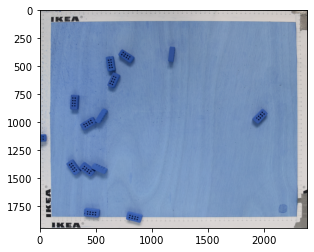

In [18]:
point = a
point_2 = np.array([[740,649], [751, 102], [119,81], [78, 611]])
img1 = cv2.imread(aaa, 3)
img1 = locate_tray(img1, point)
img2 = cv2.imread(bbb, 3)
img2 = locate_tray(img2, point)
#from PIL import Image
#im = Image.fromarray(img)
#im.save("your_file.jpeg")
cv2.imwrite("test/trail_only/filename_empty.jpg", img1)
cv2.imwrite("test/trail_only/filename_not_empty.jpg", img2)